<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/dataDownloadStreamGages1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy
!pip install rioxarray
!pip install rasterstats
!pip install climata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import numpy as np
import numpy.ma as ma
import geopandas as gpd
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from climata.usgs import DailyValueIO, InstantValueIO

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep
import os
import rioxarray as rxr

In [15]:
register_matplotlib_converters()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [16]:
first_dates_sentinel_nt =["2016-12-07", "2016-12-19", "2016-12-31", "2017-01-12", "2017-01-24", "2017-02-05", "2017-02-17", "2017-03-13", "2017-12-02", "2017-12-14", "2017-12-26", "2018-01-07", "2018-01-19", "2018-01-31", "2018-02-12", "2018-03-08", "2018-12-21", "2019-01-02", "2019-01-14", "2019-01-26", "2019-02-07", "2019-02-19", "2019-03-03", "2019-03-15", "2019-12-04", "2019-12-16", "2019-12-28", "2020-01-09", "2020-01-21", "2020-02-02", "2020-02-14", "2020-02-26", "2020-03-09"]
second_dates_sentinel_nt = ["2016-12-19", "2016-12-31", "2017-01-12", "2017-01-24", "2017-02-05", "2017-02-17", "2017-03-13", "2017-03-25", "2017-12-14", "2017-12-26", "2018-01-07", "2018-01-19", "2018-01-31", "2018-02-12", "2018-03-08", "2018-03-20", "2019-01-02", "2019-01-14", "2019-01-26", "2019-02-07", "2019-02-19", "2019-03-03", "2019-03-15", "2019-03-27", "2019-12-16", "2019-12-28", "2020-01-09", "2020-01-21", "2020-02-02", "2020-02-14", "2020-02-26", "2020-03-09", "2020-03-21"]

In [17]:
sentinel_data_df = pd.DataFrame({'first_datetime':first_dates_sentinel_nt,'second_datetime':second_dates_sentinel_nt})
print(sentinel_data_df)
type(sentinel_data_df) 

   first_datetime second_datetime
0      2016-12-07      2016-12-19
1      2016-12-19      2016-12-31
2      2016-12-31      2017-01-12
3      2017-01-12      2017-01-24
4      2017-01-24      2017-02-05
5      2017-02-05      2017-02-17
6      2017-02-17      2017-03-13
7      2017-03-13      2017-03-25
8      2017-12-02      2017-12-14
9      2017-12-14      2017-12-26
10     2017-12-26      2018-01-07
11     2018-01-07      2018-01-19
12     2018-01-19      2018-01-31
13     2018-01-31      2018-02-12
14     2018-02-12      2018-03-08
15     2018-03-08      2018-03-20
16     2018-12-21      2019-01-02
17     2019-01-02      2019-01-14
18     2019-01-14      2019-01-26
19     2019-01-26      2019-02-07
20     2019-02-07      2019-02-19
21     2019-02-19      2019-03-03
22     2019-03-03      2019-03-15
23     2019-03-15      2019-03-27
24     2019-12-04      2019-12-16
25     2019-12-16      2019-12-28
26     2019-12-28      2020-01-09
27     2020-01-09      2020-01-21
28     2020-01

pandas.core.frame.DataFrame

In [23]:
# set parameters
nyears = 1
ndays = 365 * nyears
huc = "02020004"
station_ids = ["01354330", "01355475", "01356000"]
param_id = "00065"

data = DailyValueIO(
    start_date="2019-01-26",
    end_date="2019-02-07",
    station= station_ids,
    param_id = "00065"
)

date = []
value = []

for series in data:
    for row in series.data:
        date.append(row[0])
        value.append(row[1])

In [24]:
site_names = [[series.site_name] * len(series.data) for series in data]

# unroll the list of lists
flat_site_names = [item for sublist in site_names for item in sublist]

In [25]:
print(site_names)

[['MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY'], ['MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY', 'MOHAWK RIVER AT REXFORD NY'], [], ['M

In [26]:
# bundle the data into a data frame
df = pd.DataFrame({'site': flat_site_names, 
                   'date': date, 
                   'value': value})

# remove missing values
df = df[df['value'] != -999999.0]

In [27]:
print(df)

                                          site       date  value
0   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-01-26  23.13
1   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-01-27  20.41
2   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-01-28  19.04
3   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-01-29  17.72
4   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-01-30  17.07
5   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-01-31  16.50
6   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-01  15.89
7   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-02  16.42
8   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-03  16.69
9   MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-04  17.09
10  MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-05  18.39
11  MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-06  21.29
12  MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-07  21.58
13                  MOHAWK RIVER AT REXFORD NY 2019-01-26  16.19
14                  MOHAW

In [29]:
#climata DailyValueIO returns only discharge (ft3) for freeman's bridge gage (01354500) - manually input daily average stage height (ft) at this gage from 1.26-2.07
freemans_DVIO = [16.5993403, 13.9783681, 12.9084722, 12.1203472, 11.5525, 11.0840625, 10.648438, 10.578993, 11.398333, 11.446632, 12.361597, 14.902951, 15.245719]
print(freemans_DVIO)

[16.5993403, 13.9783681, 12.9084722, 12.1203472, 11.5525, 11.0840625, 10.648438, 10.578993, 11.398333, 11.446632, 12.361597, 14.902951, 15.245719]


In [21]:
lock8_vd_0207 = value[12] - value[0]
print(lock8_vd_0207)

-1.5500000000000007


In [30]:
freemans_vd_0207 = freemans_DVIO[12] - freemans_DVIO[0]
print(freemans_vd_0207)

-1.3536213000000021


In [34]:
rexford_vd_0207 = value[25] - value[13]
print(rexford_vd_0207)

-1.870000000000001


In [35]:
vischer_vd_0207 = value[38] - value[26]
print(vischer_vd_0207)

-0.15000000000000036


In [31]:
lock8_0207 = [-1.5500000000000007]
freemans_0207 = [-1.3536213000000021]
rexford_0207 = [-1.870000000000001]
vischer_0207 = [-0.15000000000000036]

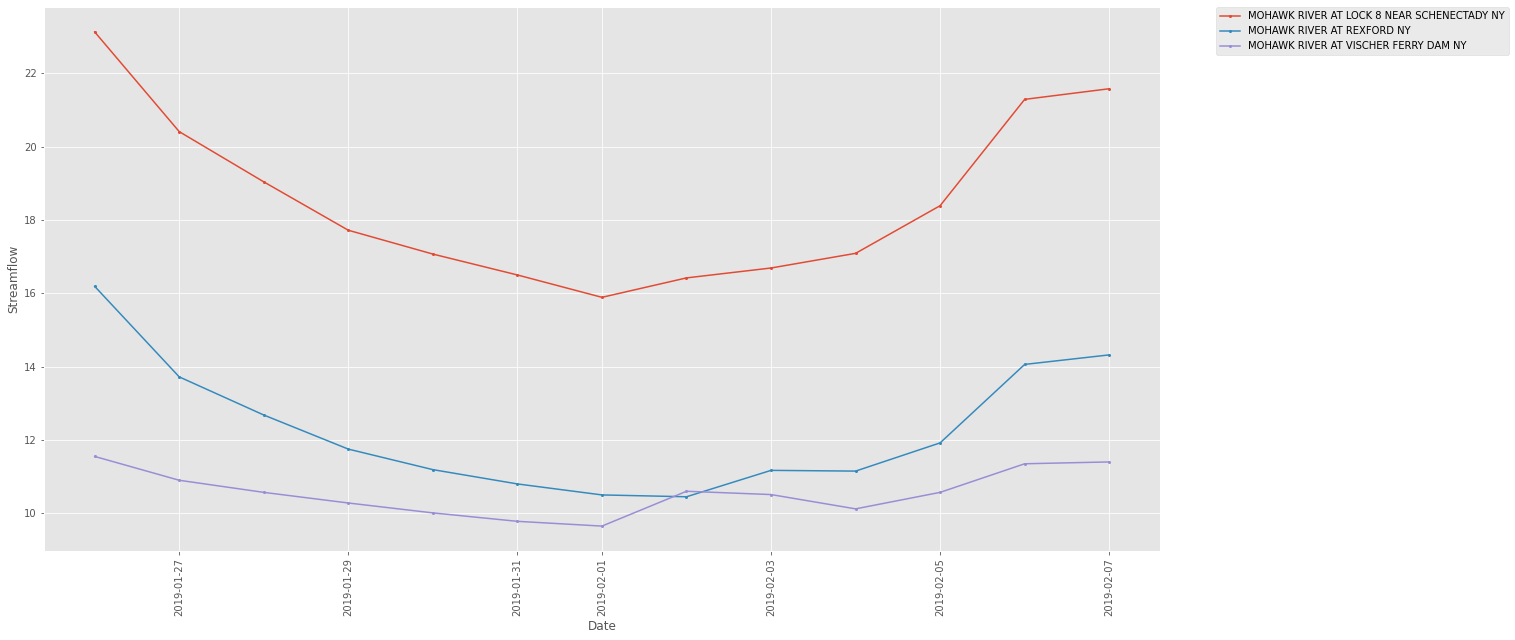

In [37]:
# visualize flow time series, coloring by site
groups = df.groupby('site')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.date, group.value, marker='o', linestyle='-', ms=2, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.xticks(rotation='vertical')
plt.show()